## 准备MALDI输入

In [1]:
import squidpy as sq
import scanpy as sc

In [2]:
adata_sm = sc.read_h5ad("MALDI/9AA_A4_uMAIA_aligned.h5ad")
adata_sm

AnnData object with n_obs × n_vars = 63446 × 1000
    obs: 'Scanned', 'x_raw', 'y_raw', 'x_scaled', 'y_scaled', 'x_scaled_aligned', 'y_scaled_aligned'
    uns: 'img_shape'
    obsm: 'spatial', 'spatial_aligned'

In [3]:
adata_sm.obs

Scanned  x_raw  y_raw  x_scaled  y_scaled  x_scaled_aligned   
15        True     30      2   1846.20    123.08       2542.233802  \
16        True     31      2   1907.74    123.08       2603.511696   
17        True     32      2   1969.28    123.08       2664.789590   
18        True     33      2   2030.82    123.08       2726.067485   
19        True     34      2   2092.36    123.08       2787.345379   
...        ...    ...    ...       ...       ...               ...   
63456     True     60    303   3692.40  18646.62       4360.705250   
63457     True     61    303   3753.94  18646.62       4422.015788   
63458     True     62    303   3815.48  18646.62       4483.326326   
63459     True     63    303   3877.02  18646.62       4544.636863   
63460     True     64    303   3938.56  18646.62       4605.947401   

       y_scaled_aligned  
15             6.612301  
16             6.894415  
17             7.176530  
18             7.458644  
19             7.740759  
...                 ...  
63456      18507.546199  
63457      18507.803738  
63458      18508.061277  
63459      18508.318816  
63460      18508.576355  

[63446 rows x 7 columns]

In [4]:
ref = sc.read_h5ad("MALDI/9AA_B4_uMAIA_aligned_finer_HIP_sv_CellLENS.h5ad")
ref

AnnData object with n_obs × n_vars = 3574 × 172
    obs: 'Scanned', 'x_raw', 'y_raw', 'x_scaled', 'y_scaled', 'x_scaled_aligned', 'y_scaled_aligned', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'lens_cluster'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'img_shape', 'lens_cluster_colors', 'moranI', 'spatial_neighbors'
    obsm: 'CellLENS', 'spatial', 'spatial_aligned'
    obsp: 'spatial_connectivities', 'spatial_distances'

In [5]:
adata_sm = adata_sm[:, ref.var_names].copy()

In [6]:
adata_st = sc.read_h5ad("OpenFISH/9AA_5m_A4_ablation.h5ad")

In [7]:
ref1 = sc.read_h5ad("OpenFISH/9AA_B4_ablation_aligned_finer_HIP_sv_CellLENS.h5ad")
ref1

AnnData object with n_obs × n_vars = 3641 × 99
    obs: 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'lens_cluster'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'lens_cluster_colors'
    obsm: 'CellLENS', 'spatial'

In [8]:
adata_st

AnnData object with n_obs × n_vars = 63446 × 110
    obs: 'x', 'y'

In [9]:
adata_st = adata_st[:, ref1.var_names].copy()

In [10]:
adata_st.obs

x             y
0      2542.233802      6.612301
1      2603.511696      6.894415
2      2664.789590      7.176530
3      2726.067485      7.458644
4      2787.345379      7.740759
...            ...           ...
63441  4360.705250  18507.546199
63442  4422.015788  18507.803738
63443  4483.326326  18508.061277
63444  4544.636863  18508.318816
63445  4605.947401  18508.576355

[63446 rows x 2 columns]

In [11]:
adata_sm.obs = adata_sm.obs.reset_index()

In [12]:
import tifffile

In [13]:
mask = tifffile.imread("/media/duan/sda2/MALDI/Data/20251014_5FAD/Registration_A4/On_Tissue_mask.tif")

In [16]:
On_tissue = adata_st.obs.apply(lambda row: mask[round(row['y']), round(row['x'])], axis = 1)

In [17]:
adata_sm

AnnData object with n_obs × n_vars = 63446 × 172
    obs: 'index', 'Scanned', 'x_raw', 'y_raw', 'x_scaled', 'y_scaled', 'x_scaled_aligned', 'y_scaled_aligned'
    uns: 'img_shape'
    obsm: 'spatial', 'spatial_aligned'

/home/duan/miniconda3/envs/squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


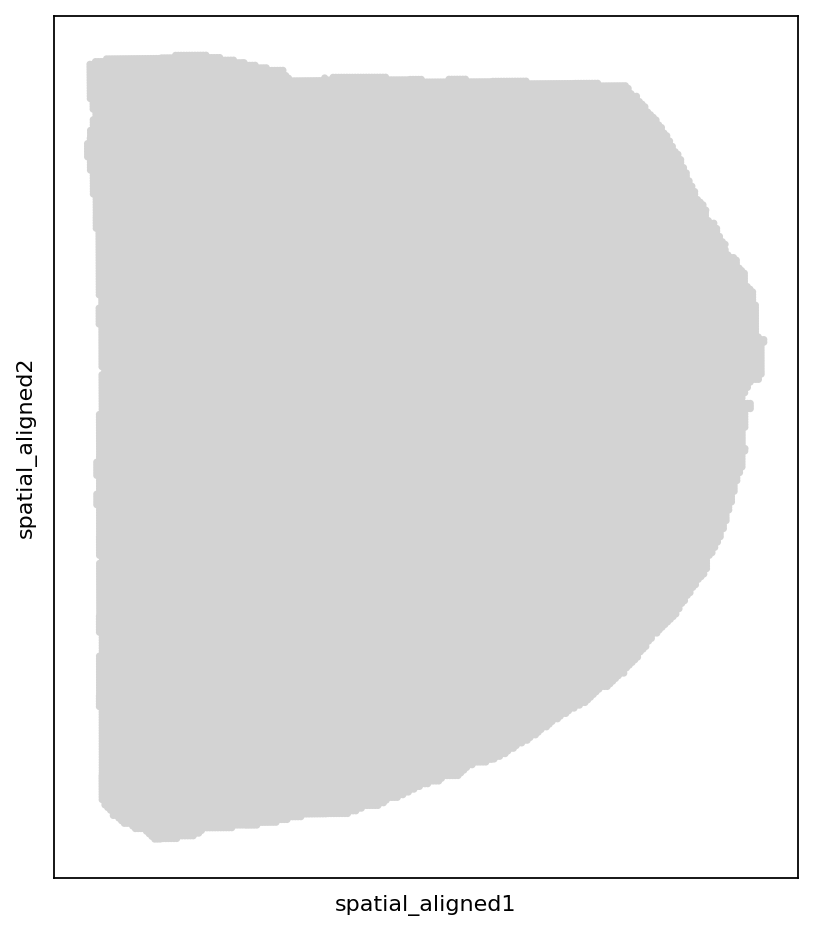

In [18]:
sc.set_figure_params(figsize = (6,7), scanpy = False, dpi_save=300)
sc.pl.embedding(adata_sm[On_tissue > 0], basis = 'spatial_aligned', size = 40)

In [19]:
adata_sm = adata_sm[On_tissue > 0].copy()
adata_st = adata_st[On_tissue > 0].copy()

/home/duan/miniconda3/envs/squidpy/lib/python3.9/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [20]:
adata_sm.write_h5ad("9AA_A4_whole_MALDI.h5ad")
adata_st.write_h5ad("9AA_A4_whole_FISH.h5ad")

## 转化为rds

In [1]:
Input_h5ad <- "9AA_A4_whole_FISH.h5ad"
Output_rds <-  "9AA_A4_whole_FISH.rds"

In [2]:
reticulate::use_condaenv("/home/duan/miniconda3/envs/seuratv5")
sceasy::convertFormat(Input_h5ad, from="anndata", to="seurat",
                      outFile=Output_rds)

Loading required namespace: Seurat

X -> counts



An object of class Seurat 
99 features across 58542 samples within 1 assay 
Active assay: RNA (99 features, 0 variable features)
 2 layers present: counts, data

In [3]:
Input_h5ad <- "9AA_A4_whole_MALDI.h5ad"
Output_rds <-  "9AA_A4_whole_MALDI.rds"

In [4]:
reticulate::use_condaenv("/home/duan/miniconda3/envs/seuratv5")
sceasy::convertFormat(Input_h5ad, from="anndata", to="seurat",
                      outFile=Output_rds)

X -> counts



An object of class Seurat 
172 features across 58542 samples within 1 assay 
Active assay: RNA (172 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: spatial, spatial_aligned

In [5]:
reticulate::use_condaenv("/home/duan/miniconda3/envs/seuratv5")

## WNN

In [5]:
library(Seurat)
library(ggplot2)
library(patchwork)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [6]:
object = readRDS("9AA_A4_whole_FISH.rds")
object

An object of class Seurat 
99 features across 58542 samples within 1 assay 
Active assay: RNA (99 features, 0 variable features)
 2 layers present: counts, data

In [7]:
MSI = readRDS("9AA_A4_whole_MALDI.rds")

In [8]:
MSI

An object of class Seurat 
172 features across 58542 samples within 1 assay 
Active assay: RNA (172 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: spatial, spatial_aligned

In [9]:
# create a new assay to store ADT information
MSI_assay <- CreateAssay5Object(counts = MSI[["RNA"]]$counts)

In [10]:
object[["MALDI"]] <- MSI_assay

In [11]:
object

An object of class Seurat 
271 features across 58542 samples within 2 assays 
Active assay: RNA (99 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: MALDI

In [12]:
DefaultAssay(object) <- 'RNA'
VariableFeatures(object) <- rownames(object[["RNA"]])
object <- NormalizeData(object)
object <- ScaleData(object)
object <- RunPCA(object)

DefaultAssay(object) <- 'MALDI'
#object <- NormalizeData(object)
object <- FindVariableFeatures(object, nfeatures = 172)
object <- NormalizeData(object)
object <- ScaleData(object)
object <- RunPCA(object, reduction.name = 'mpca')

Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
PC_ 1 
Positive:  Mog, Agt, Prox1, Ermn, Flt1, Pltp, Trh, Slco1a4, Cldn5, Shox2 
	   Slc6a20a, Igf2, Synpo2, Ecrg4, Rgs5, Tmem212, Ccdc153, Csf1r, Gpr17, Tagln 
	   Vtn, Dcn, Foxj1, Pvalb, P2ry12, Tcf7l2, Cspg4, Fn1, Otp, Adora2a 
Negative:  Satb2, Thy1, Bcl11a, Cck, Cplx2, Slc17a7, Nrn1, Kcnip2, Rasgrp1, Vxn 
	   Prkcg, Slit3, Atp2b4, Adcy1, Lmo3, Tafa2, Pdgfrb, Lamp5, Reln, Hs3st2 
	   Rasl10a, Gabra1, C1ql3, Cadps2, Bcl11b, Dner, Elavl2, Hap1, Cpne4, Synpr 
PC_ 2 
Positive:  Slc17a7, Nrn1, Vxn, Hs3st2, Fezf2, Gabra1, Rasgrp1, Nr4a2, C1ql3, Rasl10a 
	   Shox2, Zeb2, Nfib, Il17ra, Cpne4, Cadps2, Slc17a6, Prkcg, Adcy1, Synpo2 
	   Rspo2, Bcl11a, Slit3, Shisa6, Etv1, Tafa2, Rprm, Cplx3, Grm3, Cit 
Negative:  Gad2, Slc32a1, Gad1, Penk, Hap1, Meis2, Baiap3, Drd2, Gpr88, Adora2a 
	   Tmem88b, Pdyn, La

In [13]:
# Identify multimodal neighbors. These will be stored in the neighbors slot, 
# and can be accessed using bm[['weighted.nn']]
# The WNN graph can be accessed at bm[["wknn"]], 
# and the SNN graph used for clustering at bm[["wsnn"]]
# Cell-specific modality weights can be accessed at bm$RNA.weight
object <- FindMultiModalNeighbors(
  object, reduction.list = list("pca", "mpca"), 
  dims.list = list(1:15, 1:15), modality.weight.name = "RNA.weight"
)

Calculating cell-specific modality weights

Finding 20 nearest neighbors for each modality.

Calculating kernel bandwidths

Warning message in FindMultiModalNeighbors(object, reduction.list = list("pca", :
“The number of provided modality.weight.name is not equal to the number of modalities. RNA.weight MALDI.weight are used to store the modality weights”
Finding multimodal neighbors

Constructing multimodal KNN graph

Constructing multimodal SNN graph



In [14]:
object

An object of class Seurat 
271 features across 58542 samples within 2 assays 
Active assay: MALDI (172 features, 172 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, mpca

In [15]:
object[["weighted.nn"]]

A Neighbor object containing the 20 nearest neighbors for 58542 cells

In [16]:
options(future.globals.maxSize = 3e+09)

In [17]:
future::plan(strategy = "sequential")

In [18]:
options(repr.plot.height = 8, repr.plot.width =10)

In [19]:
object <- RunUMAP(object, nn.name = "weighted.nn", reduction.name = "wnn.umap", reduction.key = "wnnUMAP_", umap.method = "uwot-learn")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
Warning message in RunUMAP.default(object = neighborlist, reduction.model = reduction.model, :
“'uwot-learn' is deprecated. Set umap.method = 'uwot' and return.model = TRUE”
UMAP will return its model

18:47:14 UMAP embedding parameters a = 0.9922 b = 1.112

18:47:14 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 20

18:47:14 22 smooth knn distance failures

18:47:15 Initializing from normalized Laplacian + noise (using RSpectra)

18:47:15 Commencing optimization for 200 epochs, with 1895554 positive edges

18:47:34 Optimization finished

18:47:34 Note: model requested with precomputed neighbors. For transforming new data, distance data must be provided separately



In [20]:
object <- FindClusters(object, graph.name = "wsnn", algorithm = 1, resolution = 0.5, verbose = TRUE)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 58542
Number of edges: 1406614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8916
Number of communities: 116
Elapsed time: 7 seconds


96 singletons identified. 20 final clusters.



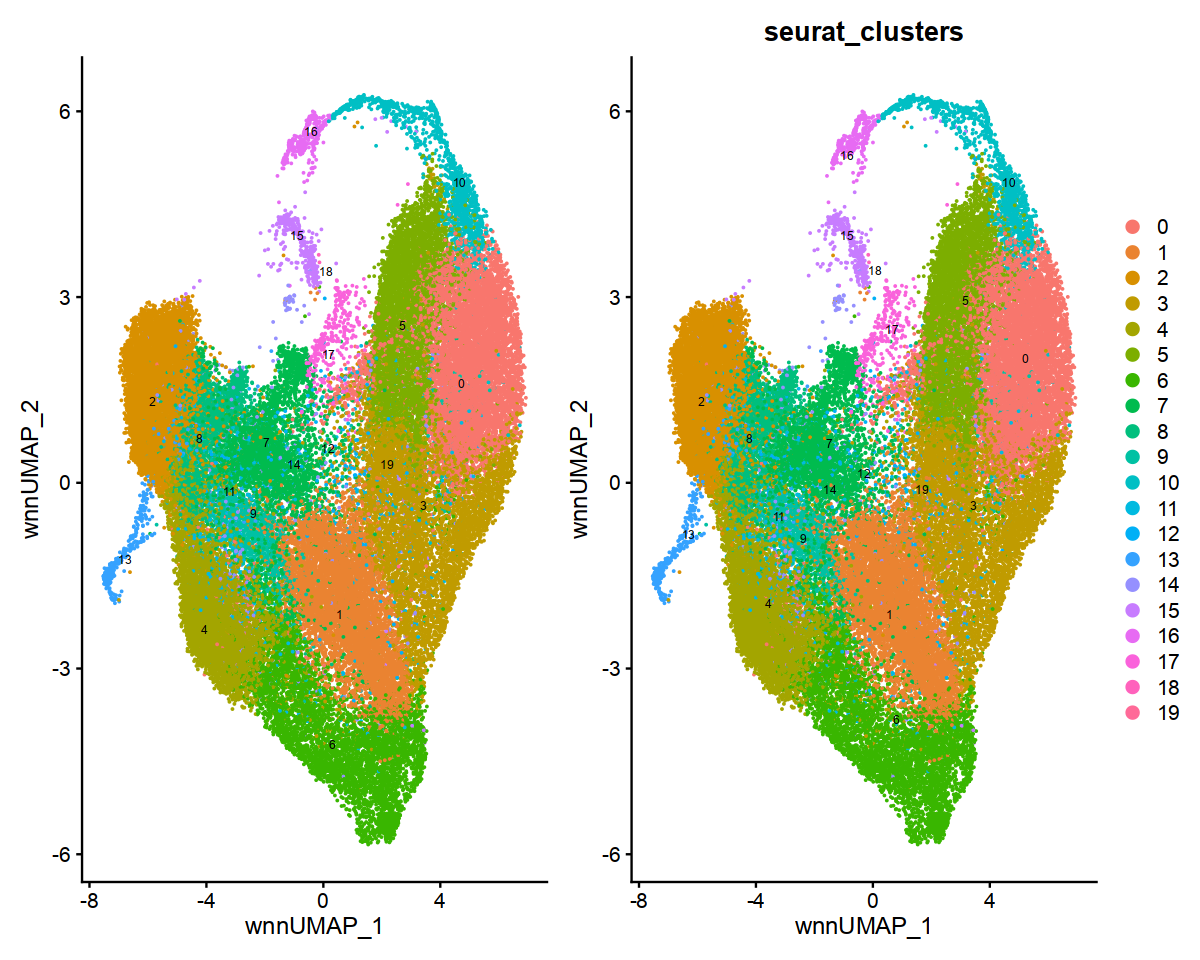

In [21]:
p1 <- DimPlot(object, reduction = 'wnn.umap', label = TRUE, repel = TRUE, label.size = 2.5) + NoLegend()
p2 <- DimPlot(object, reduction = 'wnn.umap', group.by = 'seurat_clusters', label = TRUE, repel = TRUE, label.size = 2.5)
p1 + p2

In [22]:
object <- FindClusters(object, graph.name = "wsnn", algorithm = 1, resolution = 0.5, verbose = TRUE)
object <- FindClusters(object, graph.name = "wsnn", algorithm = 1, resolution = 0.6, verbose = TRUE)
object <- FindClusters(object, graph.name = "wsnn", algorithm = 1, resolution = 0.7, verbose = TRUE)
object <- FindClusters(object, graph.name = "wsnn", algorithm = 1, resolution = 0.8, verbose = TRUE)
object <- FindClusters(object, graph.name = "wsnn", algorithm = 1, resolution = 0.9, verbose = TRUE)
object <- FindClusters(object, graph.name = "wsnn", algorithm = 1, resolution = 1.0, verbose = TRUE)
object <- FindClusters(object, graph.name = "wsnn", algorithm = 1, resolution = 1.1, verbose = TRUE)
object <- FindClusters(object, graph.name = "wsnn", algorithm = 1, resolution = 1.2, verbose = TRUE)
object <- FindClusters(object, graph.name = "wsnn", algorithm = 1, resolution = 1.3, verbose = TRUE)
object <- FindClusters(object, graph.name = "wsnn", algorithm = 1, resolution = 1.4, verbose = TRUE)
object <- FindClusters(object, graph.name = "wsnn", algorithm = 1, resolution = 1.5, verbose = TRUE)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 58542
Number of edges: 1406614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8916
Number of communities: 116
Elapsed time: 7 seconds


96 singletons identified. 20 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 58542
Number of edges: 1406614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8828
Number of communities: 116
Elapsed time: 9 seconds


96 singletons identified. 20 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 58542
Number of edges: 1406614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8744
Number of communities: 118
Elapsed time: 8 seconds


96 singletons identified. 22 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 58542
Number of edges: 1406614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8671
Number of communities: 120
Elapsed time: 8 seconds


96 singletons identified. 24 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 58542
Number of edges: 1406614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8590
Number of communities: 120
Elapsed time: 8 seconds


96 singletons identified. 24 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 58542
Number of edges: 1406614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8520
Number of communities: 121
Elapsed time: 8 seconds


96 singletons identified. 25 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 58542
Number of edges: 1406614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8452
Number of communities: 122
Elapsed time: 8 seconds


96 singletons identified. 26 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 58542
Number of edges: 1406614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8410
Number of communities: 128
Elapsed time: 7 seconds


96 singletons identified. 32 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 58542
Number of edges: 1406614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8363
Number of communities: 129
Elapsed time: 8 seconds


96 singletons identified. 33 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 58542
Number of edges: 1406614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8306
Number of communities: 129
Elapsed time: 7 seconds


96 singletons identified. 33 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 58542
Number of edges: 1406614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8259
Number of communities: 131
Elapsed time: 7 seconds


96 singletons identified. 35 final clusters.



In [23]:
options(repr.plot.height = 8, repr.plot.width =14)

In [24]:
object <- FindClusters(object, graph.name = "wsnn", algorithm = 1, resolution = 0.54, verbose = TRUE)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 58542
Number of edges: 1406614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8886
Number of communities: 116
Elapsed time: 8 seconds


96 singletons identified. 20 final clusters.



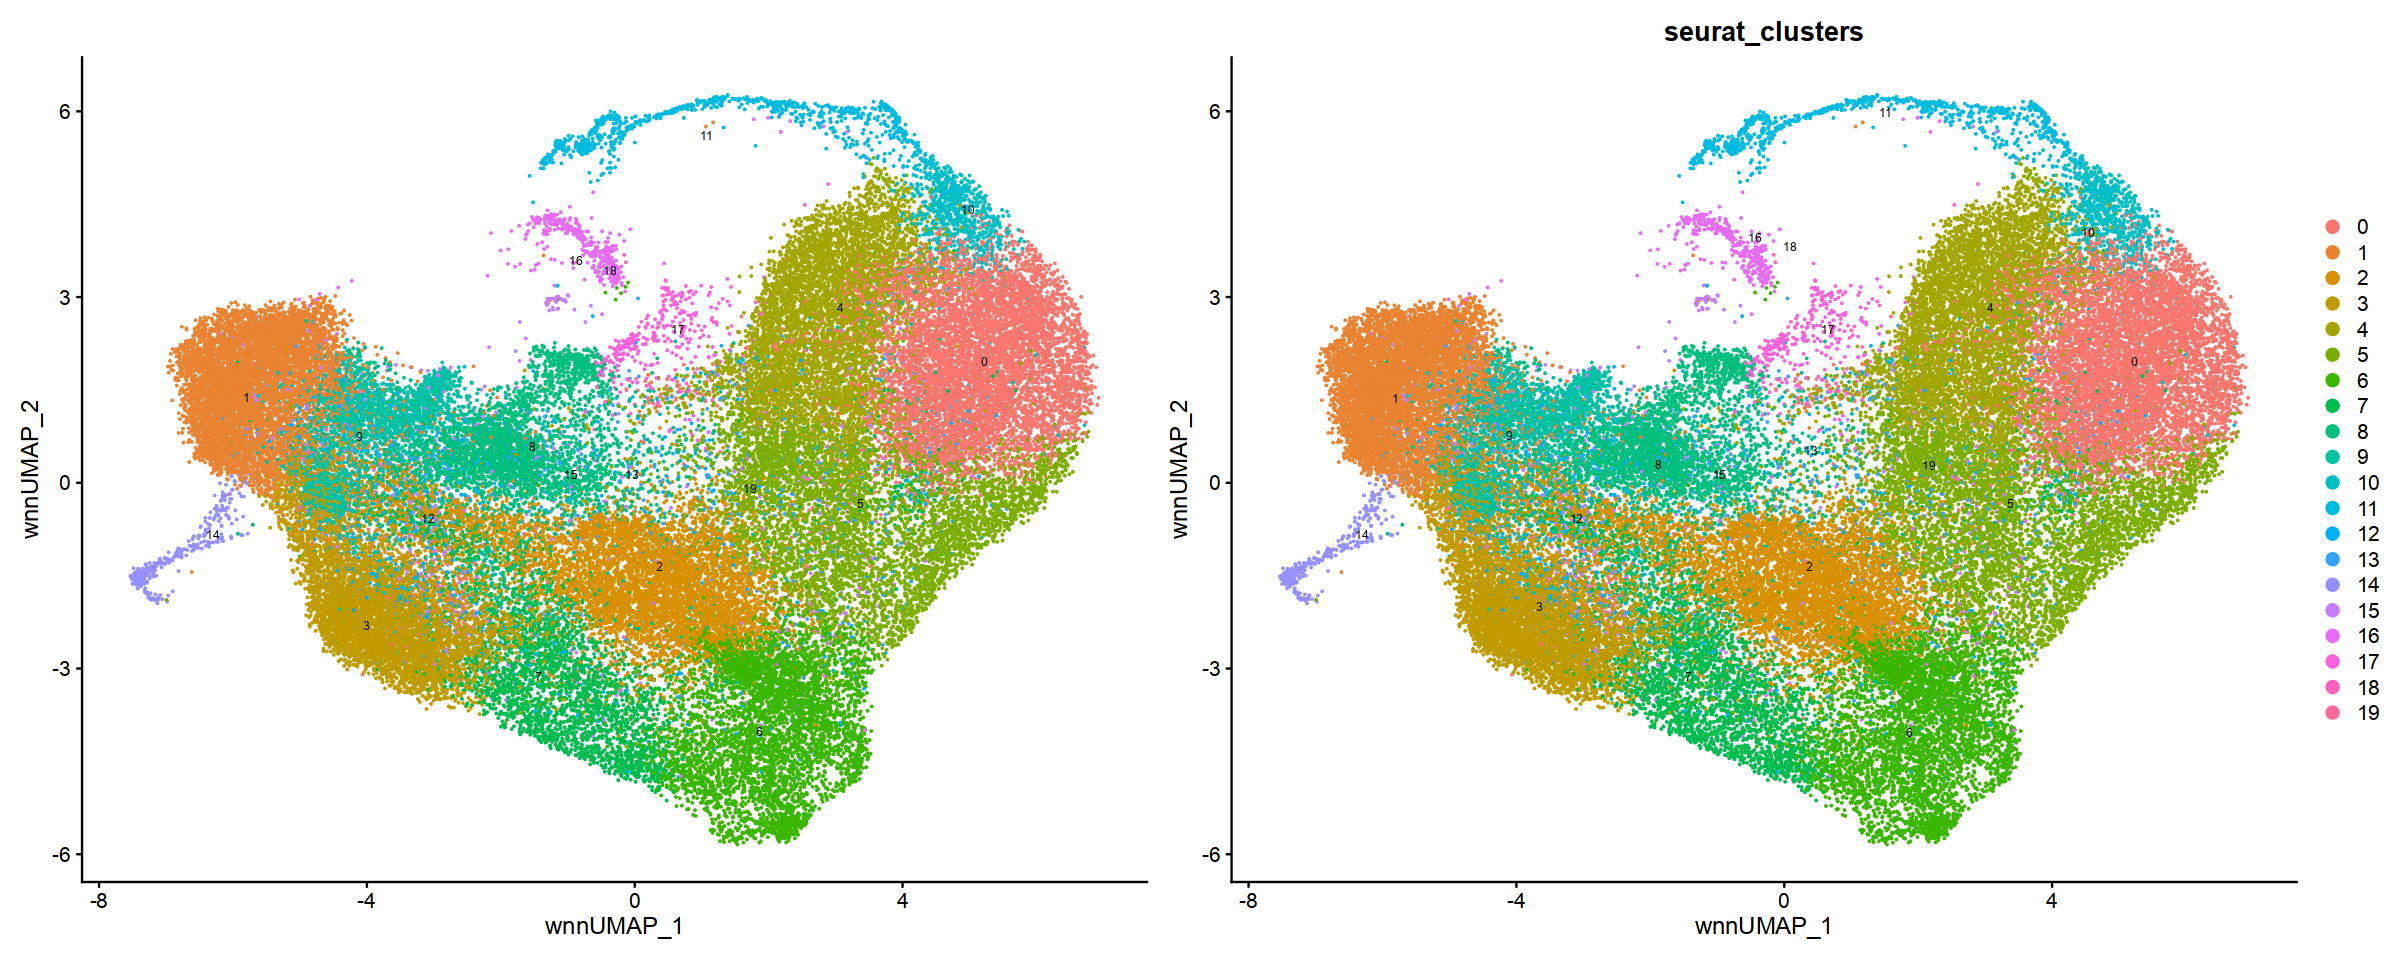

In [28]:
p1 <- DimPlot(object, reduction = 'wnn.umap', label = TRUE, repel = TRUE, label.size = 2.5) + NoLegend()
p2 <- DimPlot(object, reduction = 'wnn.umap', group.by = 'seurat_clusters', label = TRUE, repel = TRUE, label.size = 2.5)
p1 + p2

In [29]:
options(repr.plot.height = 8, repr.plot.width =20)

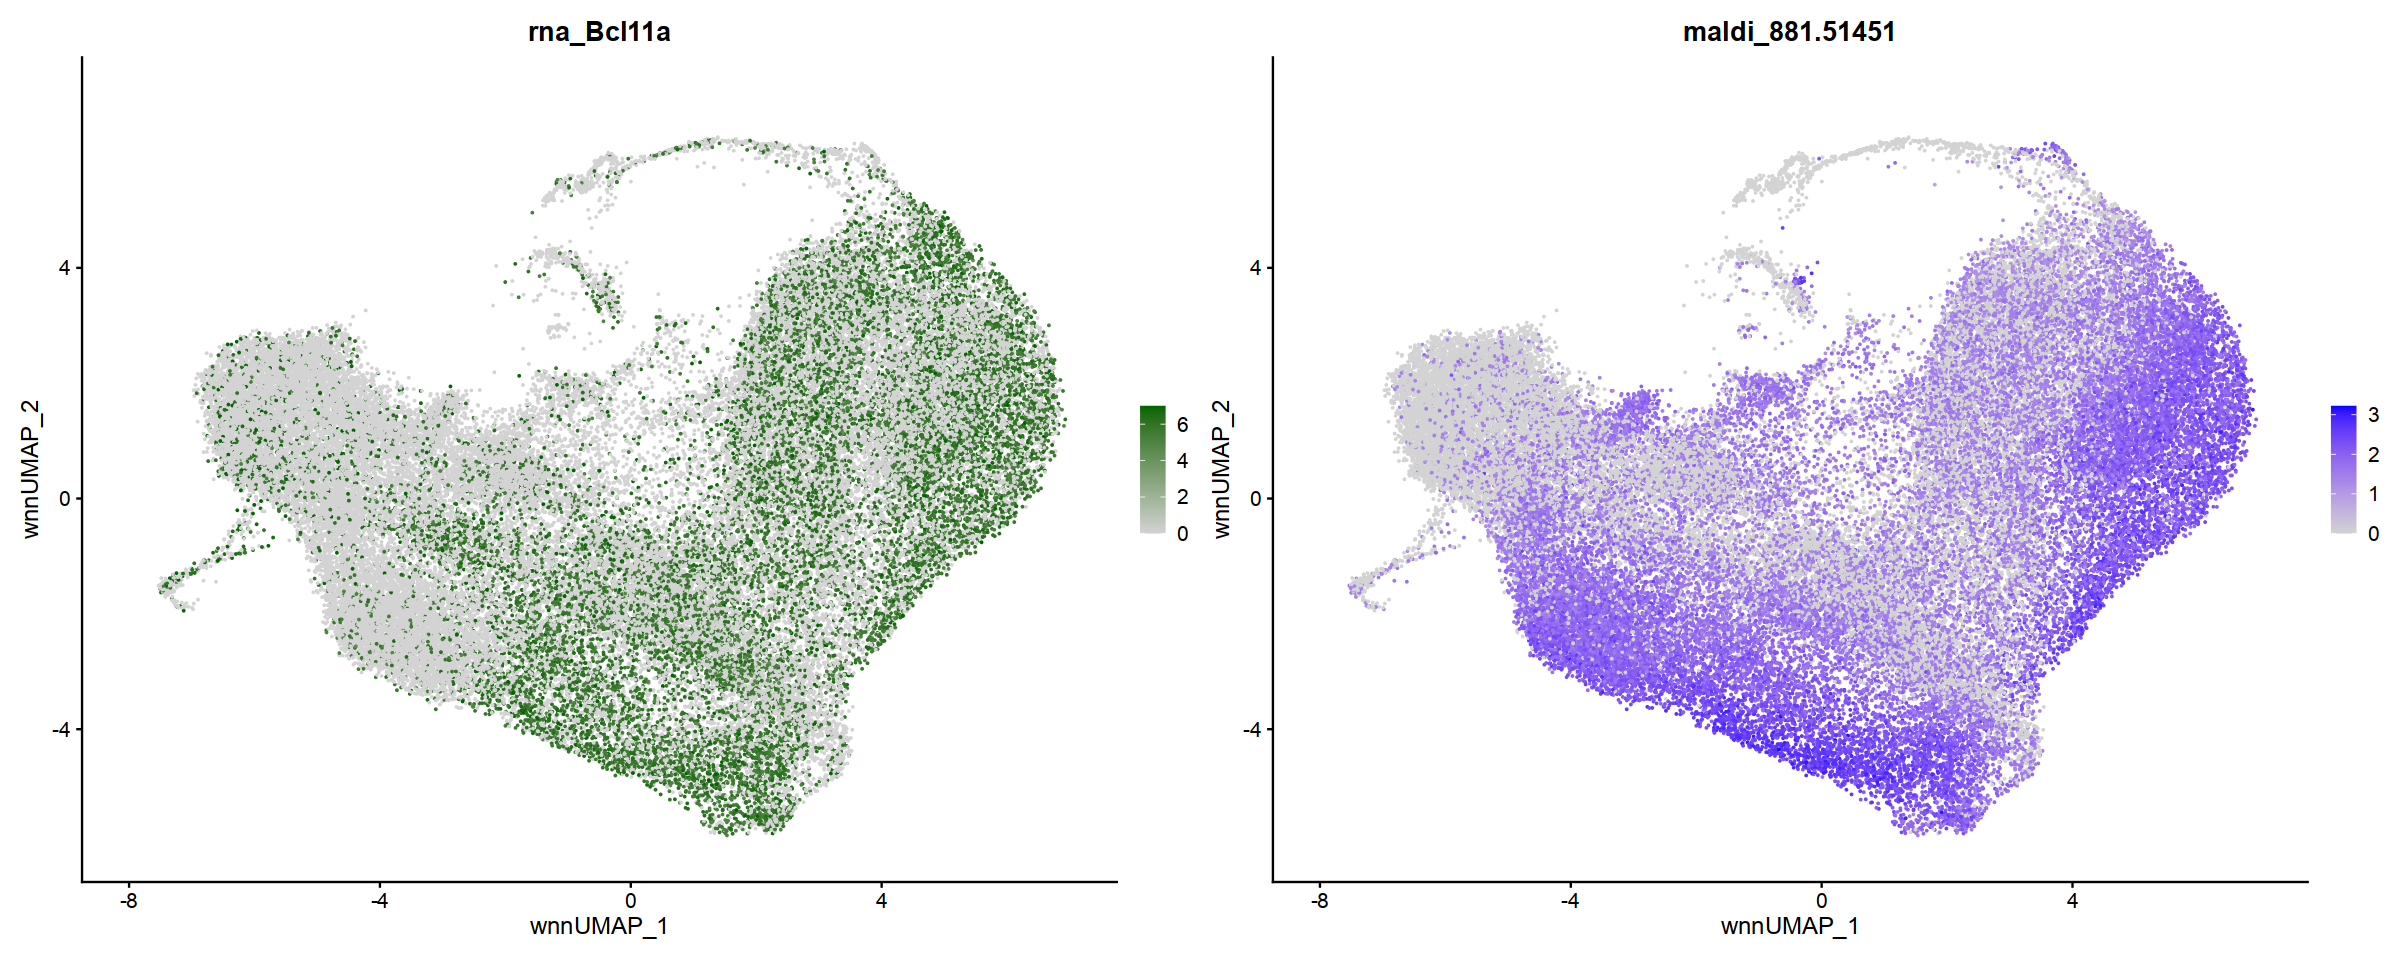

In [30]:
p5 <- FeaturePlot(object, features = c("rna_Bcl11a"),
                  reduction = 'wnn.umap', max.cutoff = 7, 
                  cols = c("lightgrey","darkgreen"), ncol = 2)
p6 <- FeaturePlot(object, features = c("maldi_881.51451"), 
                  reduction = 'wnn.umap', max.cutoff = 6, ncol = 1)
p5 + p6

In [31]:
saveRDS(object, "WNN_9AA_A4_whole.rds")

In [32]:
library(Seurat)
object <- readRDS("WNN_9AA_A4_whole.rds")
object

An object of class Seurat 
271 features across 58542 samples within 2 assays 
Active assay: MALDI (172 features, 172 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, mpca, wnn.umap

In [33]:
object@neighbors$weighted.nn

A Neighbor object containing the 20 nearest neighbors for 58542 cells

In [34]:
assay.v3 <- as(object = object[["RNA"]], Class = "Assay")

In [35]:
options(Seurat.object.assay.version = "v3")

In [36]:
seu <- CreateSeuratObject(counts = assay.v3)

In [37]:
seu

An object of class Seurat 
99 features across 58542 samples within 1 assay 
Active assay: RNA (99 features, 99 variable features)
 3 layers present: counts, data, scale.data

In [38]:
seu@meta.data <- object@meta.data

In [39]:
seu@reductions$umap <- object@reductions$umap
seu@reductions$spatial <- object@reductions$spatial
seu@reductions$wnn_umap <- object@reductions$wnn.umap

In [40]:
seu@neighbors$weighted.nn <- object@neighbors$weighted.nn

In [41]:
reticulate::use_condaenv("/home/duan/miniconda3/envs/seuratv5")

In [42]:
sceasy::convertFormat(seu, from="seurat", to="anndata",
                       outFile='WNN_9AA_A4_whole_FISH.h5ad')

AnnData object with n_obs × n_vars = 58542 × 99
    obs: 'x', 'y', 'nCount_MALDI', 'nFeature_MALDI', 'nCount_RNA', 'nFeature_RNA', 'RNA.weight', 'MALDI.weight', 'wsnn_res.0.5', 'seurat_clusters', 'wsnn_res.0.6', 'wsnn_res.0.7', 'wsnn_res.0.8', 'wsnn_res.0.9', 'wsnn_res.1', 'wsnn_res.1.1', 'wsnn_res.1.2', 'wsnn_res.1.3', 'wsnn_res.1.4', 'wsnn_res.1.5', 'wsnn_res.0.54'
    var: 'name'
    obsm: 'X_wnn_umap'

In [43]:
assay.v3 <- as(object = object[["MALDI"]], Class = "Assay")

In [44]:
options(Seurat.object.assay.version = "v3")

In [45]:
seu <- CreateSeuratObject(counts = assay.v3)

In [46]:
seu

An object of class Seurat 
172 features across 58542 samples within 1 assay 
Active assay: RNA (172 features, 172 variable features)
 3 layers present: counts, data, scale.data

In [47]:
seu@meta.data <- object@meta.data

In [48]:
seu@reductions$umap <- object@reductions$umap
seu@reductions$spatial <- object@reductions$spatial
seu@reductions$wnn_umap <- object@reductions$wnn.umap
seu@neighbors$weighted.nn <- object@neighbors$weighted.nn

In [49]:
reticulate::use_condaenv("/home/duan/miniconda3/envs/seuratv5")

In [50]:
sceasy::convertFormat(seu, from="seurat", to="anndata",
                       outFile='WNN_9AA_A4_whole_MALDI.h5ad')

Warning message in .regularise_df(Seurat::GetAssay(obj, assay = assay)@meta.features, :
“Dropping single category variables:vf_vst_counts_variable”


AnnData object with n_obs × n_vars = 58542 × 172
    obs: 'x', 'y', 'nCount_MALDI', 'nFeature_MALDI', 'nCount_RNA', 'nFeature_RNA', 'RNA.weight', 'MALDI.weight', 'wsnn_res.0.5', 'seurat_clusters', 'wsnn_res.0.6', 'wsnn_res.0.7', 'wsnn_res.0.8', 'wsnn_res.0.9', 'wsnn_res.1', 'wsnn_res.1.1', 'wsnn_res.1.2', 'wsnn_res.1.3', 'wsnn_res.1.4', 'wsnn_res.1.5', 'wsnn_res.0.54'
    var: 'vf_vst_counts_mean', 'vf_vst_counts_variance', 'vf_vst_counts_variance.expected', 'vf_vst_counts_variance.standardized', 'vf_vst_counts_rank', 'var.features', 'var.features.rank'
    obsm: 'X_wnn_umap'

## 看看WNN的结果

In [1]:
import scanpy as sc

In [2]:
adata1 = sc.read_h5ad("WNN_9AA_A4_whole_FISH.h5ad")
adata2 = sc.read_h5ad("WNN_9AA_A4_whole_MALDI.h5ad")

In [3]:
adata1

AnnData object with n_obs × n_vars = 58542 × 99
    obs: 'x', 'y', 'nCount_MALDI', 'nFeature_MALDI', 'nCount_RNA', 'nFeature_RNA', 'RNA.weight', 'MALDI.weight', 'wsnn_res.0.5', 'seurat_clusters', 'wsnn_res.0.6', 'wsnn_res.0.7', 'wsnn_res.0.8', 'wsnn_res.0.9', 'wsnn_res.1', 'wsnn_res.1.1', 'wsnn_res.1.2', 'wsnn_res.1.3', 'wsnn_res.1.4', 'wsnn_res.1.5', 'wsnn_res.0.54'
    var: 'name'
    obsm: 'X_wnn_umap'

In [4]:
sc.set_figure_params(figsize=(7,5.5), scanpy = False, dpi_save= 150)

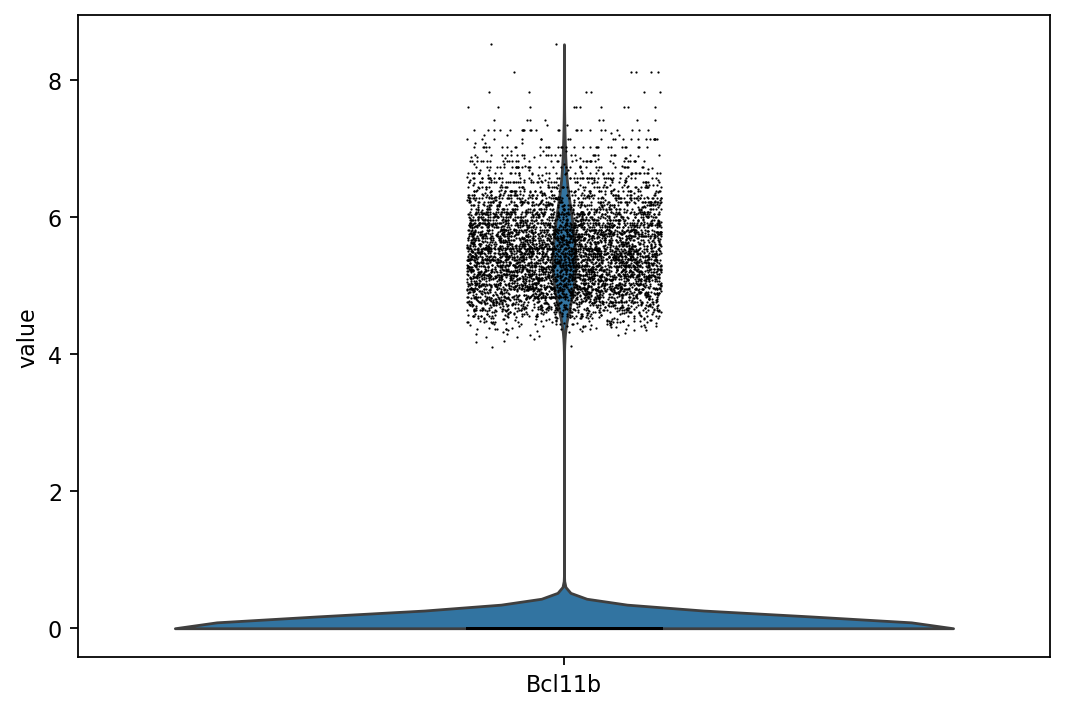

In [5]:
sc.pl.violin(adata1, keys = 'Bcl11b')

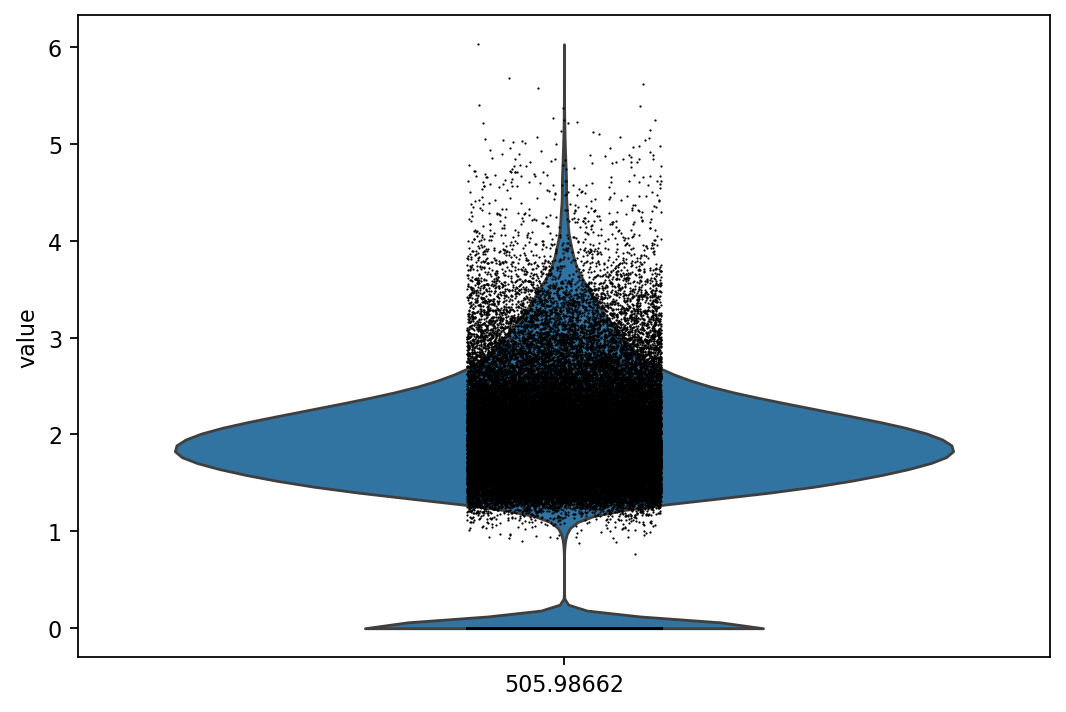

In [6]:
sc.pl.violin(adata2, keys = '505.98662')

In [12]:
adata1

AnnData object with n_obs × n_vars = 58542 × 99
    obs: 'x', 'y', 'nCount_MALDI', 'nFeature_MALDI', 'nCount_RNA', 'nFeature_RNA', 'RNA.weight', 'MALDI.weight', 'wsnn_res.0.5', 'seurat_clusters', 'wsnn_res.0.6', 'wsnn_res.0.7', 'wsnn_res.0.8', 'wsnn_res.0.9', 'wsnn_res.1', 'wsnn_res.1.1', 'wsnn_res.1.2', 'wsnn_res.1.3', 'wsnn_res.1.4', 'wsnn_res.1.5', 'wsnn_res.0.54'
    var: 'name'
    obsm: 'X_wnn_umap'

In [14]:
adata1.obsm['spatial'] = adata1.obs[['x','y']].to_numpy()

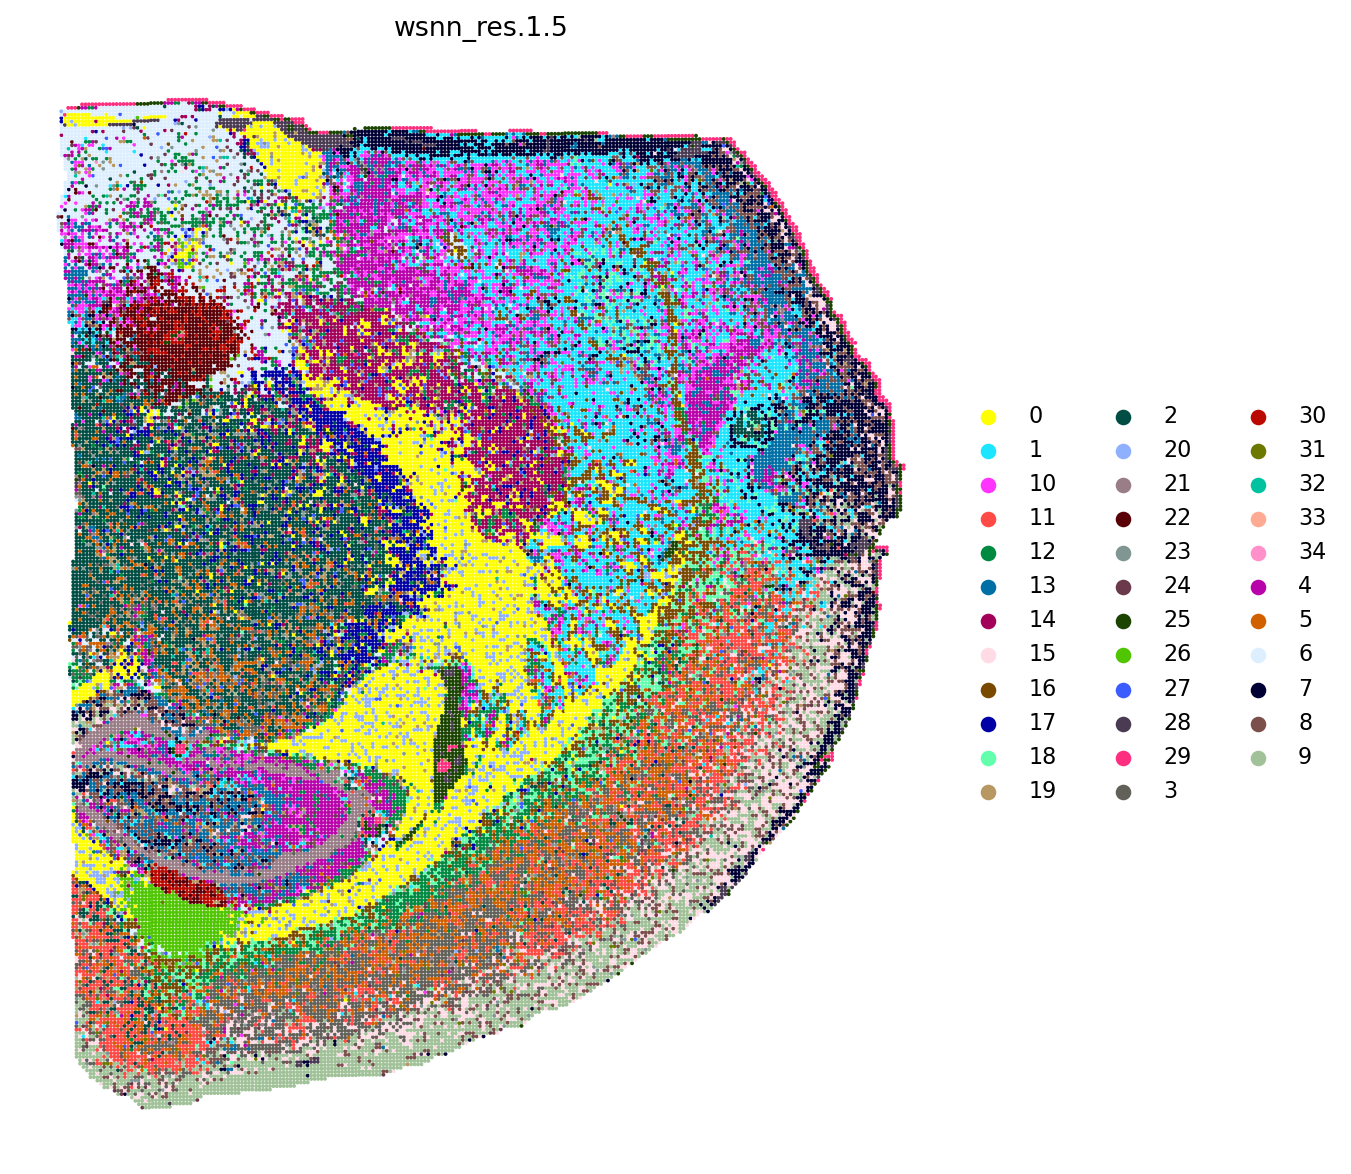

In [24]:
sc.set_figure_params(figsize=(7.5,9), scanpy = False, dpi_save= 150)
sc.pl.embedding(adata1, basis = 'spatial', color = 'wsnn_res.1.5', size = 12, frameon = False)